# Housing Project

Task: Help the Irvine Company best predict house prices by creating a model that most accurately predicts house prices

_

Import libraries

In [2]:
#most important library, used to import dataset and create dataframes
import pandas as pd
#library that helps us do math calculations
import numpy as np
#tool used for visualization
import matplotlib.pyplot as plt
#visualization tool
import seaborn as sns
#makes sure that our graph is going to be inside this notebook
%matplotlib inline

Import data

In [3]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv('1533148642_test.csv')

Understand the data

In [4]:
#look at first 5 rows to get an understanding of columns and overall data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

What can we gather so far:
1. We have a mix of numerical and categorical variables
2. We have A LOT of columns


In [5]:
data['Id'].count()

1460

In [6]:
data['Id'].nunique()

1460

Confirms that there are no repeated user Ids. 1460 unique rows and 81 columns.

In [7]:
data.shape

(1460, 81)

How many columns have null values?

In [8]:
#will only show us 60 columns at a time, we cannot see the remaining 21
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

When you have 80/90% missing data field in a column, taking the mean/med, filling in the values won't help

In [9]:
data.dropna(thresh=1000, axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [10]:
df = data.dropna(thresh=1000, axis=1)

Give us a list of all the null values

In [11]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
                ... 
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond   

Which columns did I drop? So we can make a list of those dropped columns.

In [12]:
#don't need paranthesis on properties , columns are properties
#you cannot sutract one list from another
#convert to set
set(data.columns) - set(df.columns) 

{'Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC'}

In [13]:
#lets save this result into a variable
columns_dropped = set(data.columns) - set(df.columns) 
#double check it works
columns_dropped

{'Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC'}

In [14]:
#how many columns still have missing values? (rounabout way)
pd.Series(df.isnull().sum()>0).value_counts()

False    62
True     14
dtype: int64

14 columns have missing values
62 columns don't have missing values

In [15]:
#include means ('only pick these ones')
num_columns = df.select_dtypes(exclude = ['object']).columns.values.tolist()
cat_columns = df.select_dtypes(include = ['object']).columns.values.tolist()

In [16]:
# define all of our numeric columns
df_num = df[num_columns]

In [32]:
#check that all dtypes are numeric
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [17]:
# assign df that consists of only categorical columns
df_cat = df[cat_columns]

In [35]:
#doubel check all dtypes are object
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     14

In [18]:
#determine null values of df_num 
df_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [42]:
#map over 
#df_num['GarageYrBlt'] = df_num[['YearBuilt','GarageYrBlt']].apply(lambda x,y: x if y.isnull() else y)

In [19]:
#fill all numeric with median within our baseline model, median is a safer choice
df_num.GarageYrBlt.fillna(df_num.GarageYrBlt.median(), inplace=True)

/Users/alisonbunce/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
#fill all numeric with median within our baseline model
df_num.LotFrontage.fillna(df_num.LotFrontage.median(), inplace=True)

In [47]:
df_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [21]:
#fill all numeric with median within our baseline model
df_num.MasVnrArea.fillna(df_num.MasVnrArea.median(), inplace=True)

In [22]:
df_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [23]:
df_cat.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [24]:
#fill in all null categoircal values with mode
#garage
df_cat.GarageCond.fillna(df_cat.GarageCond.mode()[0], inplace=True)
df_cat.GarageQual.fillna(df_cat.GarageQual.mode()[0], inplace=True)
df_cat.GarageFinish.fillna(df_cat.GarageFinish.mode()[0], inplace=True)
df_cat.GarageType.fillna(df_cat.GarageType.mode()[0], inplace=True)
df_cat.GarageCond.fillna(df_cat.GarageCond.mode()[0], inplace=True)
#basement
df_cat.BsmtFinType2.fillna(df_cat.BsmtFinType2.mode()[0], inplace=True)
df_cat.BsmtFinType1.fillna(df_cat.BsmtFinType1.mode()[0], inplace=True)
df_cat.BsmtExposure.fillna(df_cat.BsmtExposure.mode()[0], inplace=True)
df_cat.BsmtCond.fillna(df_cat.BsmtCond.mode()[0], inplace=True)
df_cat.BsmtQual.fillna(df_cat.BsmtQual.mode()[0], inplace=True)

df_cat.Electrical.fillna(df_cat.Electrical.mode()[0], inplace=True)

df_cat.MasVnrType.fillna(df_cat.MasVnrType.mode()[0], inplace=True)

In [53]:
#double check all null bvalues have been filled in
df_cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

Determine outliers. 

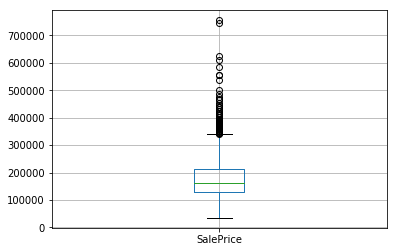

In [25]:
 df_num[['SalePrice']].boxplot()

In [26]:
 #shows us the 'extreme' potential outliers (anything outside of whiskers thought as outlier)
df_num[df_num['SalePrice'] > 700000]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
691,692,60,104.0,21535,10,6,1994,1995,1170.0,1455,...,382,50,0,0,0,0,0,1,2007,755000
1182,1183,60,160.0,15623,10,5,1996,1996,0.0,2096,...,171,78,0,0,0,555,0,7,2007,745000


outlier note: index 691, 1182

In [27]:
#merge gives you the ability to control, we can merge on similarites, such as index
#match the index of the left table with the index of the right table(where it is index 2, combine- beccause
#dataframes have exact number of rows, it will combine correctly)
df_clean = pd.merge(df_cat, df_num, left_index=True, right_index=True)

In [28]:

df_clean.shape

(1460, 76)

In [29]:
df_clean.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
                ..
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF 

In [30]:
#dropoutliers, sanity check
df_clean.drop(index=[691, 1182], axis=0)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,0,2,2008,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,0,5,2007,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,0,9,2008,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,0,2,2006,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,0,12,2008,250000
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,40,30,0,320,0,0,700,10,2009,143000
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,255,57,0,0,0,0,0,8,2007,307000
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,235,204,228,0,0,0,350,11,2009,200000
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,90,0,205,0,0,0,0,4,2008,129900
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,0,4,0,0,0,0,0,1,2008,118000


In [31]:
df_clean.drop(index=[691, 1182], axis=0, inplace=True)

In [32]:
#double check to make sure it worked correctly
df_clean.shape

(1458, 76)

Create Dummies to Clean up object subset of dataframe
do all of the object datasets together

In [33]:
df_dummies = pd.get_dummies(df_clean, drop_first=True)

In [41]:
df_dummies.shape

(1458, 234)

In [34]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Columns: 234 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(196)
memory usage: 723.3 KB


In [35]:
df_dummies.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=234)

In [36]:
df_train = df_dummies[:1458]

In [42]:
df_test = df_dummies[:1458]

In [43]:
df_train.shape, df_test.shape

((1458, 234), (1458, 234))

# Assign Independent & Dependent Variables

In [44]:
#using dot here tells comp that y is not a dataframe but a series (which is an array of data- one dimension)
Y = df_train.SalePrice

In [45]:
X = df_train.drop(['Id', 'SalePrice'], axis=1, inplace=False)

# Split the Data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_df_train, X_df_test, Y_df_train, Y_df_test = train_test_split(X, Y, test_size=0.2)

In [48]:
#check the data frames
X_df_train.shape, X_df_test.shape, Y_df_train.shape, Y_df_test.shape
#no column number in y shapes- b/c there is no column, there is just a series (the series is SalesPrice)

((1166, 232), (292, 232), (1166,), (292,))

# Modeling

Regression analysis is used when you want to predict a continuous dependent variable from a number of independent variables. 

In [49]:
#gradient boosting regressor to tell us what the RMSE (root mean square error)

#import
from sklearn.ensemble import GradientBoostingRegressor
#define
gbr = GradientBoostingRegressor()

In [50]:
#train the algo
gbr.fit(X_df_train, Y_df_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
#make prediction for your y (salesprice) based on your test data
#get a list of my predicted prices based on current algo
gbr.predict(X_df_test)

array([245068.48215407, 123652.49702713, 118750.34754835, 228405.59161752,
       220578.12626937, 102368.05781416,  81690.33728284, 262629.76959096,
       223367.41624984, 214445.46756267, 129738.07477881, 250953.3763472 ,
       231198.52033237, 109518.48254324, 154284.55114483, 154146.44232492,
       123237.59105465, 209487.76285077, 133511.7249625 , 195114.8612363 ,
       132263.85964754, 102185.25225487, 184325.53646925, 187157.97240858,
       108839.66351201, 210421.07229888, 209803.60753911, 143120.547346  ,
       358642.4679281 , 135278.42633698, 209956.30628662, 105661.35356448,
        81110.51219023, 360778.35726582, 292963.59551683, 145969.27815436,
       143461.03347931, 334130.70256582, 137732.92793695, 111384.85685889,
       124135.98949595, 147450.37958931, 226532.76997563, 151865.1404819 ,
       123284.31423685, 300820.81010948, 135423.96311548,  91288.4416748 ,
       144776.38369166, 280942.01640964, 179017.3084053 , 230584.80074128,
       179196.70749215, 4

### Based on my predictions (above), we want to compare with the original predictions 

In [58]:
#the oringal test predictions
Y_df_test

1372    274300
904     125500
432     122500
158     254900
1239    265900
557     108000
1035     84000
324     242000
255     230000
234     216500
1450    136000
517     265000
549     263000
184     127000
269     148000
1048    115000
861     131500
977     199900
879     136500
1097    170000
899     135000
232      94500
256     207500
1293    162900
438      90350
1303    232000
271     241500
741     142000
1388    377500
376     148000
         ...  
632      82500
981     336000
44      141000
592     138000
1378     83000
1459    147500
1330    227000
343     266000
81      153500
1369    232000
1116    184100
1397    137500
74      107400
641     226000
1439    197000
124     181000
548     125000
1292    107500
3       140000
320     342643
36      145000
1421    127500
764     270000
233     128200
9       118000
1335    167900
637      93000
721     143000
1379    167500
1393    163000
Name: SalePrice, Length: 292, dtype: int64

Find the error based on the predicted values vs the original values

In [59]:
#what the discrepency is between what i predicted vs the current given test data

#import the correct library for calculation
from sklearn.metrics import mean_squared_error

In [60]:
#put original first aka 'true values'
#compares the 2 values, finds the error, squares them
mean_squared_error(Y_df_test, gbr.predict(X_df_test))

734009834.0641745

In [61]:
#above calculation is mean squared error, it squared all the errors. now we take the square root so we can find out what the average is
np.sqrt(mean_squared_error(Y_df_test, gbr.predict(X_df_test)))

27092.615858646328

RMSE tells me: On an average I am off by $27,092.61

_

Now we have to predict on the test data from kaggle

In [62]:
# clean data, fill in missing values, get dummies, then we can predict
this does not match my training set. 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

We have to match the 2 datasets together. Different oclumns could have diff amounts of missing values. Our dataframes need to match in order to compare them. That said, we have to make sure the same columns are dropped. In the test dataframe, we can't neccessarily use the same threshhold calculation because it may apply differently than the train dataframe.

In [67]:
#find the 5 columns we dropped in train, drop exact 5 columns in test
#go back and apply inplace true to lock the change
test_data.drop(columns_dropped, axis=1, inplace=True)

Double check amount of columns we have now - recall that we started with one less column in this dataset (no SalesPrice)

#Now we have to fill in missing values

In [68]:
#assign variables (create)
num_columns = test_data.select_dtypes(exclude = ['object']).columns.values.tolist()
cat_columns = test_data.select_dtypes(include = ['object']).columns.values.tolist()

In [69]:
#split
df_cat = test_data[cat_columns]

In [ ]:
#clean num

In [ ]:
#clean cat

In [ ]:
#merge num and cat

In [ ]:
#double check

In [ ]:
#create dummies

In [ ]:
#double check

In [ ]:
#predict using gbr

In [ ]:
#submit result to kaggle

In [ ]:
#finsih baseline notebook, work on new verison of notebook

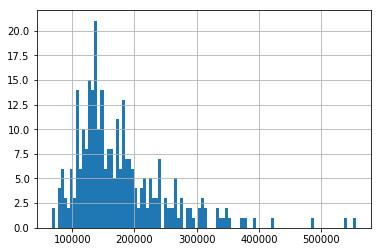

In [55]:
Y_df_test.hist(bins=100)

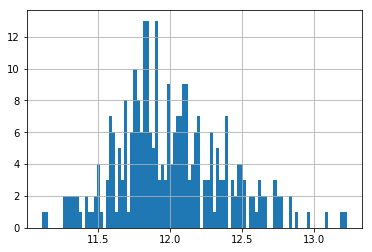

In [56]:
np.log(Y_df_test).hist(bins=100)